### **Description of the Notebook**

This notebook performs **Exploratory Data Analysis (EDA)** and hypothesis testing on a movie dataset. The main objectives of this notebook are:

1. **Data Cleaning**:
   - Removes missing values (`NaN`) from relevant columns to ensure data quality.
   - Parses and processes complex fields such as `genres`, `keywords`, and `production_countries`.

2. **Visualization and Analysis**:
   - Creates scatterplots and other visualizations to explore relationships between different features of the dataset.
   - Examples include:
     - **Vote Count vs. Vote Average**: Analyzing whether movies with more votes tend to have higher ratings.
     - **Budget vs. Vote Average**: Testing if higher-budget movies receive better ratings.
     - **Runtime vs. Vote Count**: Exploring if longer movies attract more votes.
     - **Overview Length vs. Vote Count**: Checking if movies with longer descriptions receive more votes.
     - **Number of Genres vs. Production Countries**: Investigating if movies with more genres involve more production countries.

3. **Hypothesis Testing**:
   - Tests various hypotheses about the relationships between features, such as:
     - Do movies with higher budgets tend to have higher ratings?
     - Do movies with more genres involve more production countries?
     - Do newer movies receive more votes?
   - Calculates correlations to quantify the strength of these relationships.

4. **Insights and Observations**:
   - Provides insights into the dataset through visualizations and statistical analysis.
   - Helps identify patterns and trends in the movie industry.

This notebook is designed to explore the dataset, validate assumptions, and provide a foundation for building machine learning models or recommendation systems.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

df = pd.read_csv("/Users/lara/Documents/MovieRecommendation/data/movies_metadata.csv")


/var/folders/t5/yjy34jpd7nn3szdvhdfpwh_h0000gn/T/ipykernel_88559/1961148366.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/lara/Documents/MovieRecommendation/data/movies_metadata.csv")


In [5]:
def describe_data(df: pd.DataFrame):
    """
    Prints a summary of the dataset, including missing values and basic statistics.
    Args:
        df (pd.DataFrame): The DataFrame containing movie metadata.
    """
    print("Dataset Overview:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe(include="all"))

describe_data(df)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-nul

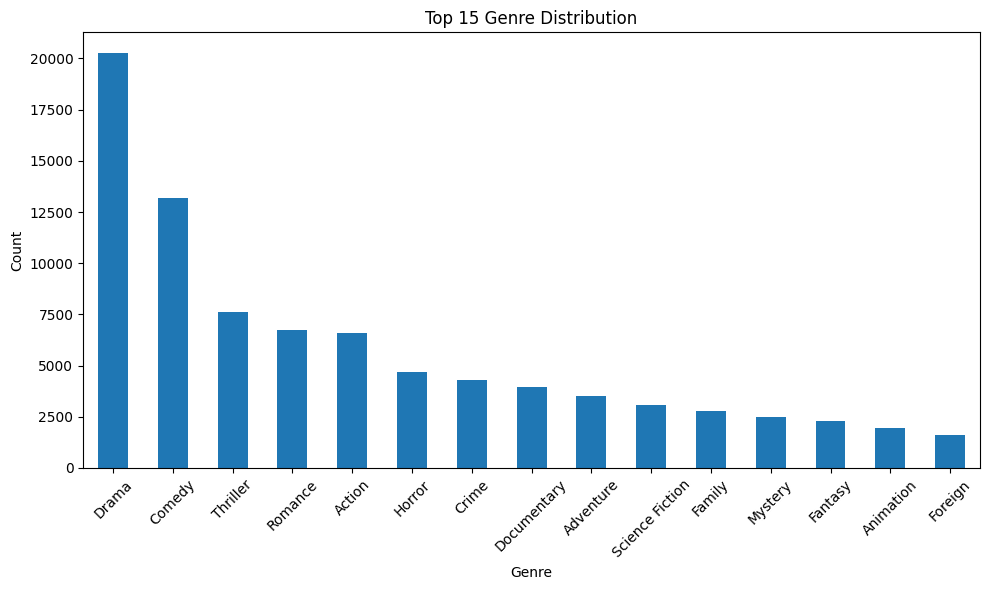

In [8]:
def plot_genre_distribution(df: pd.DataFrame):
    """
    Plots the top 15 genres by count from the 'genres' column of a movie metadata DataFrame.
    """
    # Parse genre strings to list of dicts safely
    genre_lists = df['genres'].dropna().apply(lambda x: ast.literal_eval(x))
    
    # Extract genre names
    all_genres = []
    for genre_list in genre_lists:
        for genre in genre_list:
            all_genres.append(genre['name'])

    # Create series and plot top 15 genres
    genre_counts = pd.Series(all_genres).value_counts().head(15)
    genre_counts.plot(kind='bar', figsize=(10, 6), title='Top 15 Genre Distribution')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_genre_distribution(df)


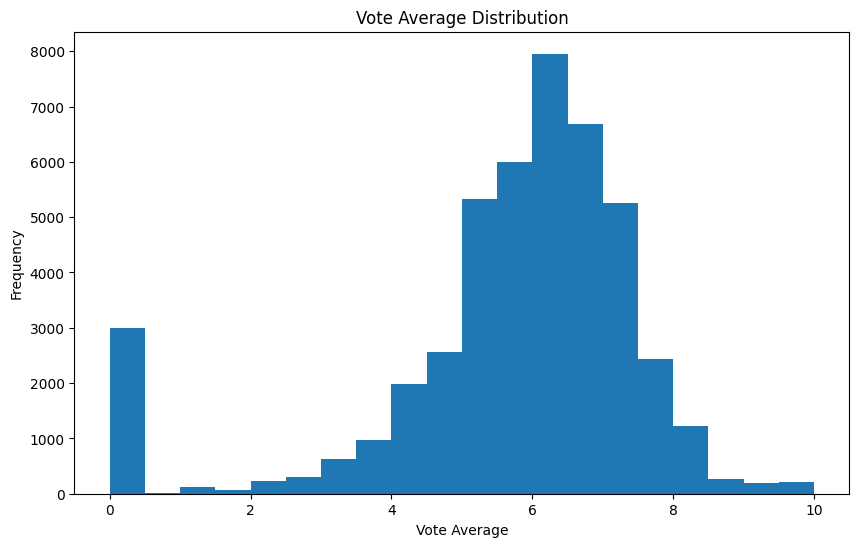

In [9]:
def plot_vote_distribution(df: pd.DataFrame):
    """
    Plots the distribution of movie ratings.
    Args:
        df (pd.DataFrame): The DataFrame containing movie metadata.
    """
    df['vote_average'].dropna().plot(kind='hist', bins=20, figsize=(10, 6), title='Vote Average Distribution')
    plt.xlabel('Vote Average')
    plt.ylabel('Frequency')
    plt.show()

plot_vote_distribution(df)


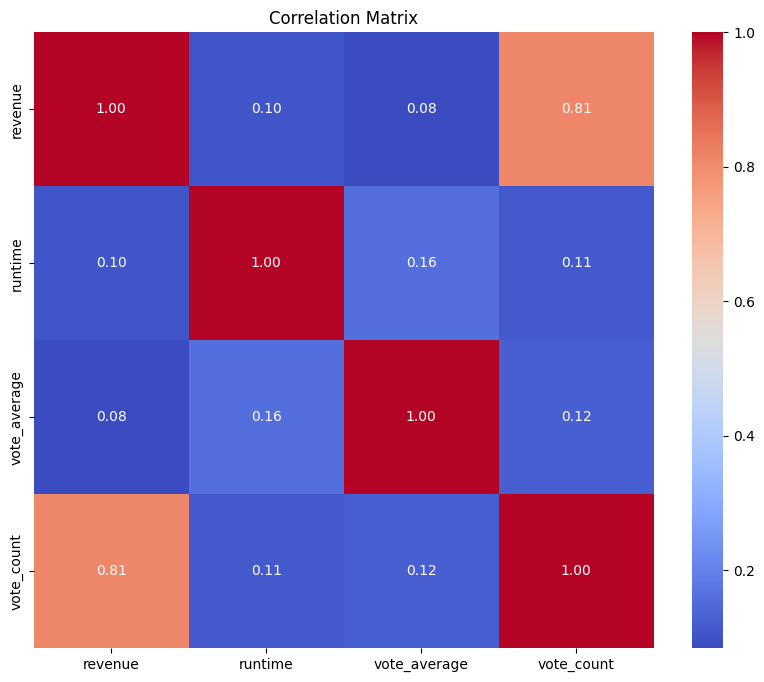

In [ ]:
def plot_correlation_matrix(df: pd.DataFrame):
    """
    Plots a correlation matrix for numerical features in the dataset.
    Args:
        df (pd.DataFrame): The DataFrame containing movie metadata.
    """
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df)


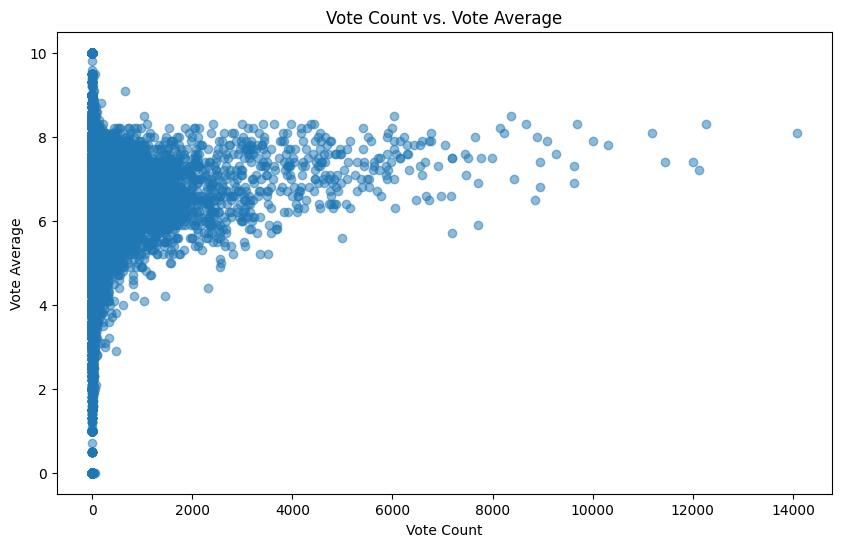

In [ ]:
def plot_vote_vs_count(df: pd.DataFrame):
    """
    Plots a scatterplot of vote average vs. vote count.
    Args:
        df (pd.DataFrame): The DataFrame containing movie metadata.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df['vote_count'], df['vote_average'], alpha=0.5)
    plt.title('Vote Count vs. Vote Average')
    plt.xlabel('Vote Count')
    plt.ylabel('Vote Average')
    plt.show()



plot_vote_vs_count(df)


/var/folders/t5/yjy34jpd7nn3szdvhdfpwh_h0000gn/T/ipykernel_85847/1071261115.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['budget'] = pd.to_numeric(df_cleaned['budget'], errors='coerce')


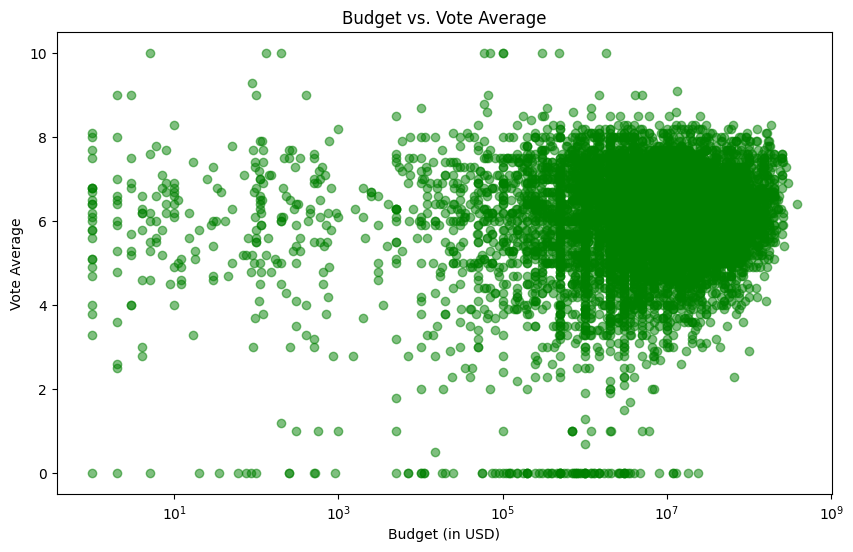

Correlation between Budget and Vote Average: 0.09


In [ ]:
def plot_budget_vs_vote(df: pd.DataFrame):
    """
    Plots a scatterplot of budget vs. vote average to test the hypothesis:
    "Do movies with higher budgets tend to have higher ratings?"
    Args:
        df (pd.DataFrame): The DataFrame containing movie metadata.
    """
    df_cleaned = df.dropna(subset=['budget', 'vote_average'])
    df_cleaned['budget'] = pd.to_numeric(df_cleaned['budget'], errors='coerce')
    df_cleaned = df_cleaned[df_cleaned['budget'] > 0]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df_cleaned['budget'], df_cleaned['vote_average'], alpha=0.5, color='green')
    plt.title('Budget vs. Vote Average')
    plt.xlabel('Budget (in USD)')
    plt.ylabel('Vote Average')
    plt.xscale('log')
    plt.show()
    
    correlation = df_cleaned['budget'].corr(df_cleaned['vote_average'])
    print(f"Correlation between Budget and Vote Average: {correlation:.2f}")

plot_budget_vs_vote(df)

/var/folders/t5/yjy34jpd7nn3szdvhdfpwh_h0000gn/T/ipykernel_85847/3271250904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['release_year'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce').dt.year


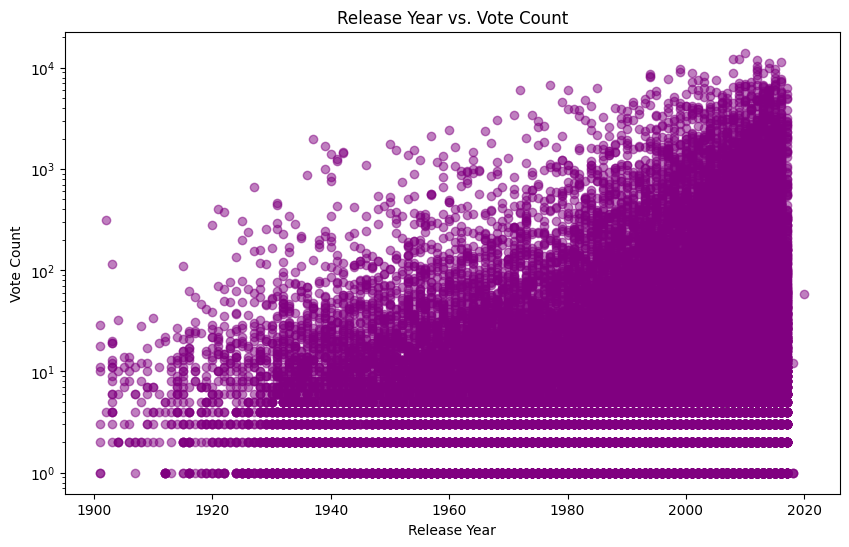

Correlation between Release Year and Vote Count: 0.11


In [ ]:
def plot_release_year_vs_vote_count(df: pd.DataFrame):
    """
    Plots a scatterplot of release year vs. vote count to test the hypothesis:
    "Do newer movies tend to have more votes?"
    Args:
        df (pd.DataFrame): The DataFrame containing movie metadata.
    """
    df_cleaned = df.dropna(subset=['release_date', 'vote_count'])
    df_cleaned['release_year'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce').dt.year
    df_cleaned = df_cleaned.dropna(subset=['release_year'])
    df_cleaned = df_cleaned[df_cleaned['release_year'] > 1900]  
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df_cleaned['release_year'], df_cleaned['vote_count'], alpha=0.5, color='purple')
    plt.title('Release Year vs. Vote Count')
    plt.xlabel('Release Year')
    plt.ylabel('Vote Count')
    plt.yscale('log')
    plt.show()
    
    correlation = df_cleaned['release_year'].corr(df_cleaned['vote_count'])
    print(f"Correlation between Release Year and Vote Count: {correlation:.2f}")

plot_release_year_vs_vote_count(df)